# Submited:
Nadav Banay - 326277910,
Noa Tobias - 326335064

In [ ]:
#importing all the relevant libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression, QuantileRegressor, Ridge 
from sklearn.model_selection import RepeatedKFold, cross_val_score, GridSearchCV

# Question 1:

assumption we made: we deleted all the data that was considered abnormal - we did it according to the instruction that the lecturer provided later, and by a common 'rule of thumb' that was found on the internet about what is considered to be an oulier in statistics
Moreover, we used Deming Regression as the lecturer later said in the class

## Getting started: 

In [ ]:
#A helper function for clearing outliers points in the data(what's more than 3 std units away from the mean is deleted)
def clear_outliers(x):
    lst = []
    dev = np.std(x)
    for num in x:
        if ((num-x.mean())/dev)<3 and ((num-x.mean())/dev)>-3:
            lst.append(num)
    return np.array(lst)

In [ ]:
#importing the data, splitting to x and y vals
df = pd.read_parquet("data1.parquet")
x_vals, y_vals = clear_outliers(np.array(df['x'])), clear_outliers(np.array(df['y']))

## Simple Linear Regression: 

In [ ]:
#creating the linear regression and its predictions
lin_reg=LinearRegression(fit_intercept=True).fit(x_vals.reshape(-1,1), y_vals)
lin_prediction = lin_reg.predict(x_vals.reshape(-1,1))

## Deming Regression: 

In [ ]:
#creating the Deming Regression values(by the formula in wiki)
delta = y_vals.var()/x_vals.var()
s_xy = ((x_vals - x_vals.mean()) * (y_vals - y_vals.mean())).sum() 
s_xx = ((x_vals - x_vals.mean())**2).sum()
s_yy = ((y_vals - y_vals.mean())**2).sum()

In [ ]:
#calculating the Deming regression slope value and itercept, creating predictions
deming_slope = (s_yy - delta*s_xx + np.sqrt((s_yy - delta*s_xx)**2 + 4*delta*s_xy**2)) / (2*s_xy)
deming_intercept = y_vals.mean() - x_vals.mean()*deming_slope

deming_prediction = np.array([deming_intercept+deming_slope*x for x in x_vals])

## Plotting and Comparing:

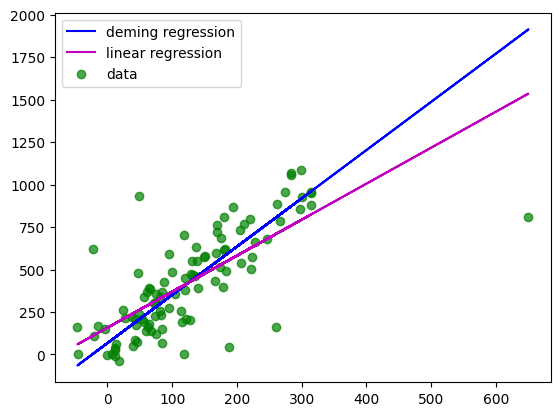

In [ ]:
plt.plot(x_vals,deming_prediction,label='deming regression',color='b')
plt.plot(x_vals,lin_prediction,label='linear regression',color='m')
plt.scatter(x_vals, y_vals, label='data', color='g', alpha=.7)
plt.legend()

# Question 2:

In [ ]:
#importing the data, splitting to x and y vals
df = pd.read_parquet("data2.parquet")
x_vals, y_vals = np.array(df['x']), np.array(df['y'])

### Linear regression

In [ ]:
#creating the regression and its corresponding redictions
lin_reg=LinearRegression(fit_intercept=True)
lin_reg.fit(x_vals.reshape(-1,1), y_vals)
prediction = lin_reg.predict(x_vals.reshape(-1,1))

## Residuals

It can be seen that the further you move away from the beginning of the graphs towards the positive direction of the x-axis, the more scattered the residual is. From this it can be concluded that the linear regression does not match the true results, in a situation where you match the linear relationship, the residual will be closer to 0.

Text(0.5, 1.0, 'Residuals')

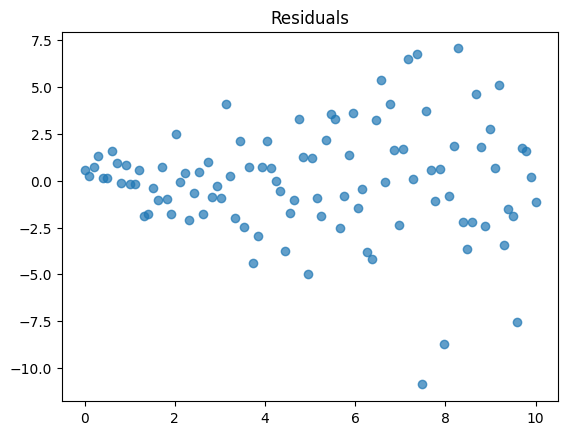

In [ ]:
#calcaulating the redisuals according to the predictions that were made before:
res = y_vals - prediction
plt.scatter(x_vals, res, label='res as function of x_test',alpha=.7)
plt.title('Residuals')

### Quantile Regression: 

Quantile regression is the regression technique employed when linear regression could not satisfy its assumptions. Quantile regression determines the median of a set of data across a distribution based on the variables within that distribution. It is an extension of the linear method of regression.

It is advisable to use this model when the quantile is also important in the prediction results, the data will usually be more scattered, mostly when the conditions of linear regression are not met. 
The main advantage of quantile regression methodology is that the method allows for understanding relationships between variables outside of the mean of the data,making it useful in understanding outcomes that are non-normally distributed and that have nonlinear relationships with predictor variables
Quantile regression allows the analyst to drop the assumption that variables operate the same at the upper tails of the distribution as at the mean and to identify the factors that are important determinants of expenditures and quality of care for different subgroups of patients.

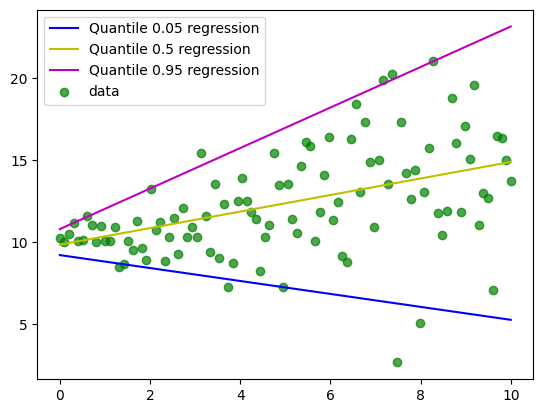

In [ ]:
#modeling the qunatiles regressions(plotting them too in order to make the model more clear)
quantiles = [0.05, 0.5, 0.95]
colors = ['b','y','m']
reg={}
for qnt in quantiles:
    regs[qnt]=QuantileRegressor(quantile=qnt, alpha = 0)
    prediction = regs[qnt].fit(x_vals.reshape(-1,1),y_vals).predict(x_vals.reshape(-1,1))
    plt.plot(x_vals,prediction,label=f'Quantile {qnt} regression', color=colors[quantiles.index(qnt)])
plt.scatter(x_vals, y_vals, label='data', color='g',alpha=.7)
plt.legend()

# Question 3

In [ ]:
#importing the data, splitting to x and y vals
df = pd.read_parquet("data3.parquet")

x_vals = np.array(df.drop(columns = 'label'))
y_vals = np.array(df['label'])

In [ ]:
#creating the grid search while using RepeatedKFold for cross validation
reg = Ridge()
parameters = {'alpha':np.arange(0,1.01,0.01)}

cross_validation = RepeatedKFold(n_splits=10, n_repeats=3)
grid_search = GridSearchCV(estimator=reg, param_grid=parameters, cv=cross_validation, scoring='neg_mean_absolute_error')
grid_search.fit(x_vals, y_vals)

GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=None),
             estimator=Ridge(),
             param_grid={'alpha': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])},
             scoring='neg_mean_absolute_error')

In [ ]:
#the best MAE score and its corresponding coefficient alpha
print(grid_search.best_params_)
print(grid_search.best_score_)

{'alpha': 0.72}
-3.3808803199202973
